In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#library regresi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn')

In [7]:
data = pd.read_csv('covid-vaccination-vs-death_ratio.csv')

In [8]:
print(data)

       Unnamed: 0      country iso_code        date  total_vaccinations  \
0               0  Afghanistan      AFG  2021-05-11            504502.0   
1               1  Afghanistan      AFG  2021-05-20            547901.0   
2               2  Afghanistan      AFG  2021-05-24            573277.0   
3               3  Afghanistan      AFG  2021-05-26            590454.0   
4               4  Afghanistan      AFG  2021-05-27            593313.0   
...           ...          ...      ...         ...                 ...   
32906       32906     Zimbabwe      ZWE  2022-03-25           8691642.0   
32907       32907     Zimbabwe      ZWE  2022-03-26           8791728.0   
32908       32908     Zimbabwe      ZWE  2022-03-27           8845039.0   
32909       32909     Zimbabwe      ZWE  2022-03-28           8934360.0   
32910       32910     Zimbabwe      ZWE  2022-03-29           9039729.0   

       people_vaccinated  people_fully_vaccinated  New_deaths  population  \
0               448878

In [11]:
# ini data head untuk deskripsi dataset
# LOAD DATA
data.head().T
#T means transpose in data head

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
iso_code,AFG,AFG,AFG,AFG,AFG
date,2021-05-11,2021-05-20,2021-05-24,2021-05-26,2021-05-27
total_vaccinations,504502.0,547901.0,573277.0,590454.0,593313.0
people_vaccinated,448878.0,470341.0,476367.0,479372.0,479574.0
people_fully_vaccinated,55624.0,77560.0,96910.0,111082.0,113739.0
New_deaths,12,10,10,19,14
population,40374668.0,40374668.0,40374668.0,40374668.0,40374668.0
ratio,1.111781,1.164941,1.179866,1.187309,1.187809


In [12]:
# EDA
# indentifikasi categorcal variabel
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

#float64=decimal
#total rows 32911 rows

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32911 non-null  int64  
 1   country                  32911 non-null  object 
 2   iso_code                 32911 non-null  object 
 3   date                     32911 non-null  object 
 4   total_vaccinations       32911 non-null  float64
 5   people_vaccinated        32911 non-null  float64
 6   people_fully_vaccinated  32911 non-null  float64
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  float64
 9   ratio                    32911 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ MB


In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
data.shape

(32911, 9)

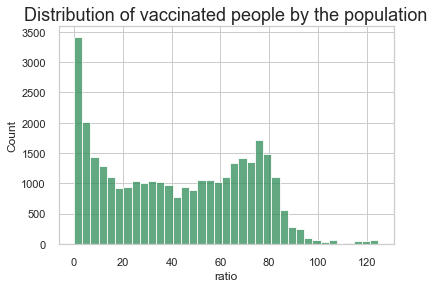

In [11]:
# Distribusi variabel target
#determine
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(data=data, x="ratio", color="seagreen")
plt.title("Distribution of vaccinated people by the population", fontsize=18);

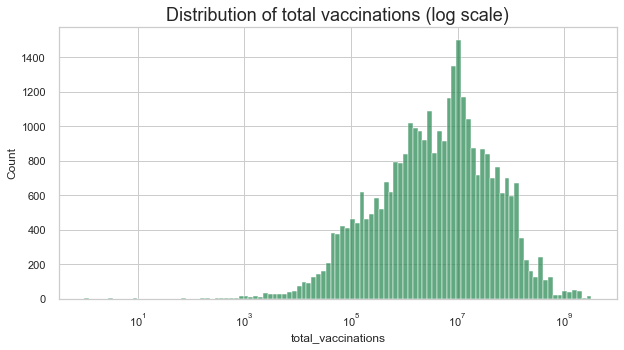

In [12]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.histplot(data=data, x="total_vaccinations", color="seagreen", log_scale=True)
plt.title("Distribution of total vaccinations (log scale)", fontsize=18);

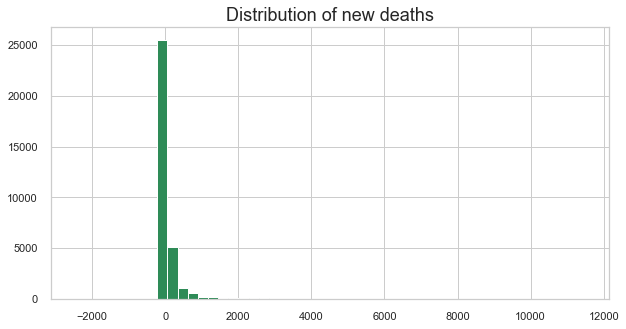

In [13]:
plt.hist(data.New_deaths.dropna().values, bins=50, color="seagreen")
plt.title("Distribution of new deaths", fontsize=18)
plt.show()

In [14]:
# TIPE VARIABEL
# Convert date to Datetime type 
#AWALNYA objek
data['date'] = pd.to_datetime(data['date'])

# Check hasil
data['date'].head()

0   2021-05-11
1   2021-05-20
2   2021-05-24
3   2021-05-26
4   2021-05-27
Name: date, dtype: datetime64[ns]

In [15]:
# Identify the categorical variables
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# Number of categorical variables
print(f' Number of categorical variables: {len(cat_vars)}')

 Number of categorical variables: 2


In [16]:
# Identify the the numerical variables
num_vars = [var for var in data.columns if var not in cat_vars]

# Number of numerical variables
print(f' Number of numerical variables: {len(num_vars)}')

 Number of numerical variables: 7


In [17]:
#MISSING VALUE
 # List of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# Percentage of missing values
data[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [18]:
# VARIABLE NUMERIK
# Descriptive statistics
data[num_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
total_vaccinations,32911.0,3.689489e+07,1.411509e+08,1.000000,7.289180e+05,4.552479e+06,2.065201e+07,3.243599e+09
people_vaccinated,32911.0,2.035846e+07,7.843235e+07,1.000000,4.571090e+05,2.724528e+06,1.158203e+07,1.275541e+09
people_fully_vaccinated,32911.0,1.471013e+07,5.735093e+07,1.000000,2.313500e+05,1.693674e+06,7.907290e+06,1.240777e+09
New_deaths,32911.0,1.000431e+02,3.395001e+02,-2440.000000,1.000000e+00,9.000000e+00,4.900000e+01,1.144700e+04
population,32911.0,5.164060e+07,1.645294e+08,1373.000000,2.962425e+06,1.034057e+07,3.826123e+07,1.447065e+09
ratio,32911.0,4.197129e+01,2.897052e+01,0.000011,1.369757e+01,4.153047e+01,6.814733e+01,1.247374e+02


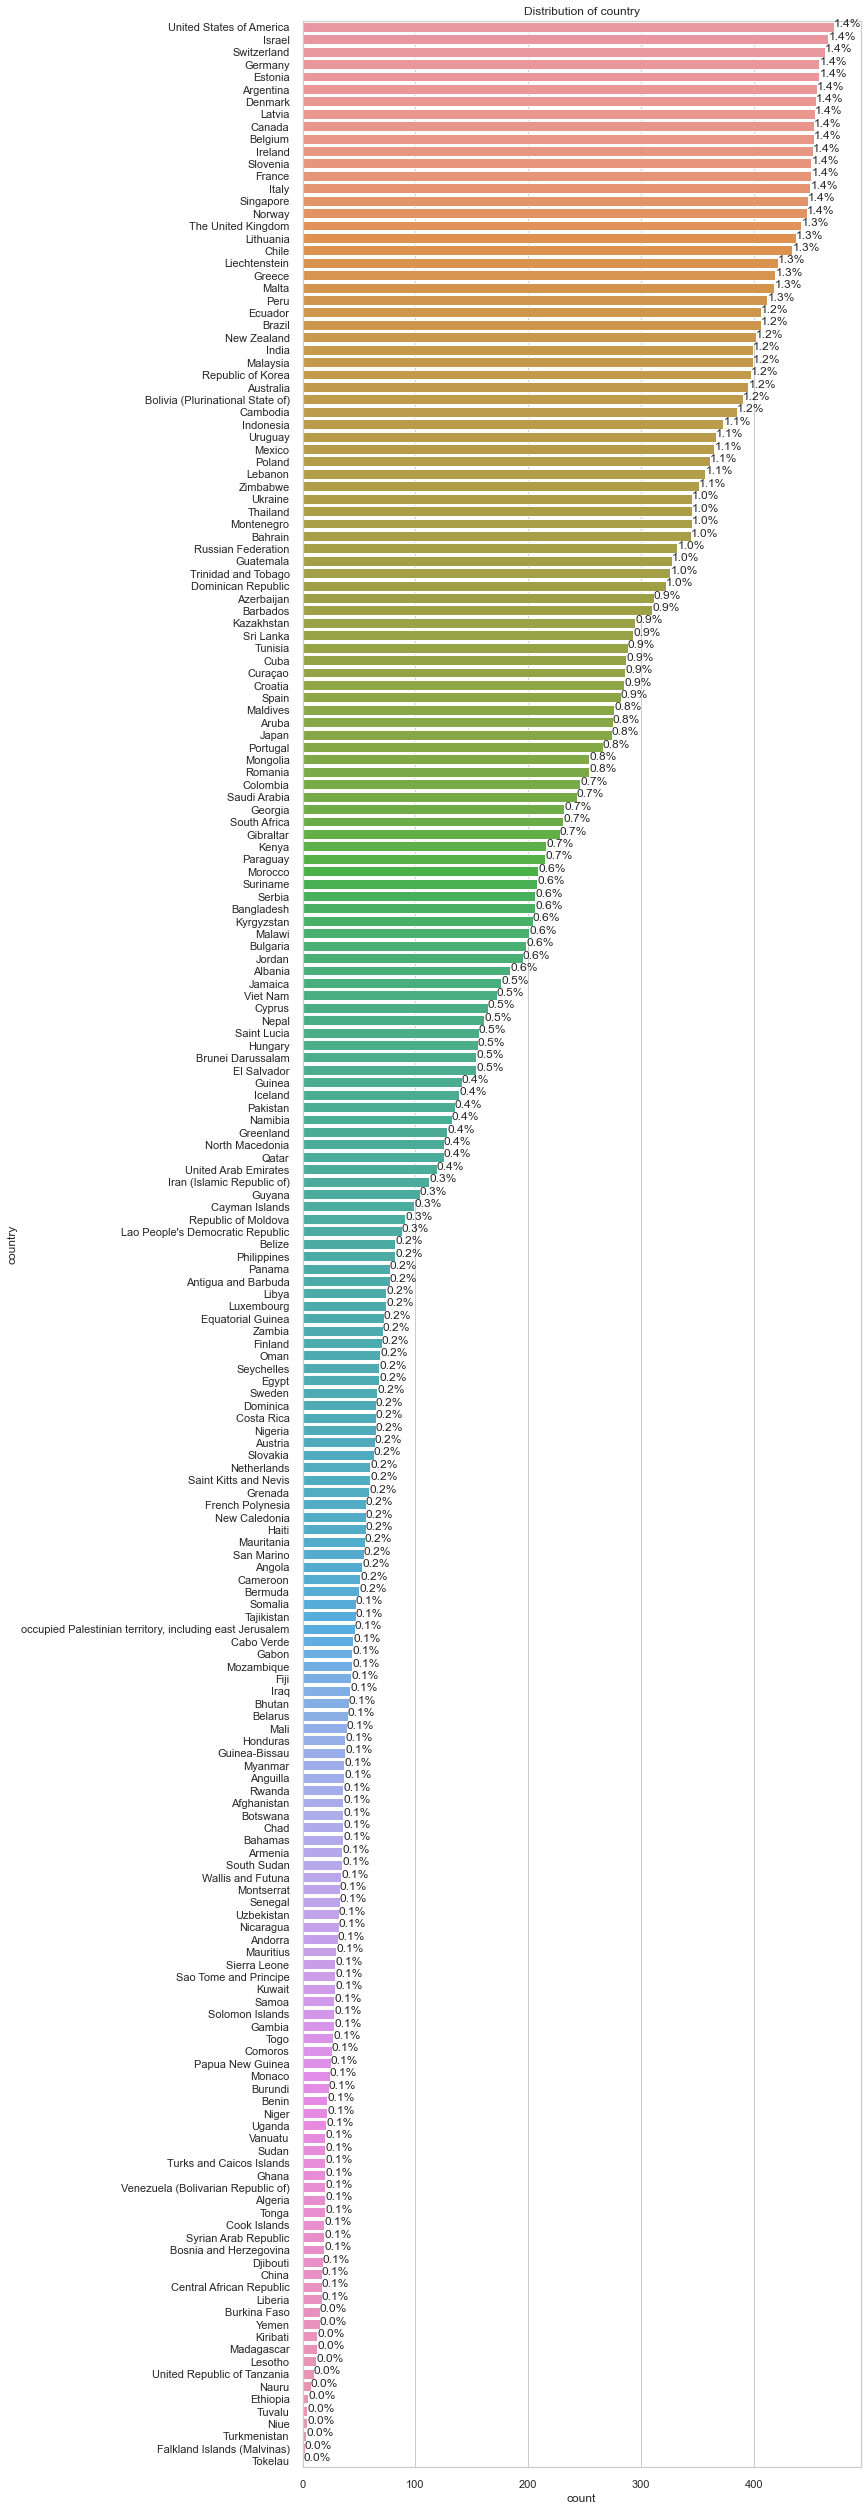

In [19]:
f, ax = plt.subplots(figsize=(10,45))
sns.countplot(y=data.country, order = data.country.value_counts().index);
ax.set_title('Distribution of country');
ax.set(ylabel='country')

total = len(data['country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

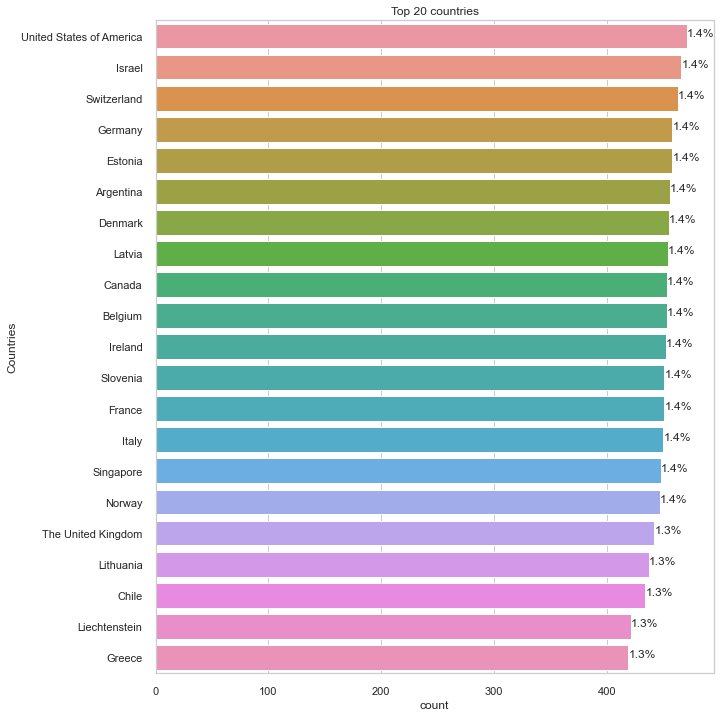

In [20]:
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y=data.country, order = data.country.value_counts().index[0:21]);
ax.set(ylabel='Countries')
ax.set_title('Top 20 countries')

total = len(data['country'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

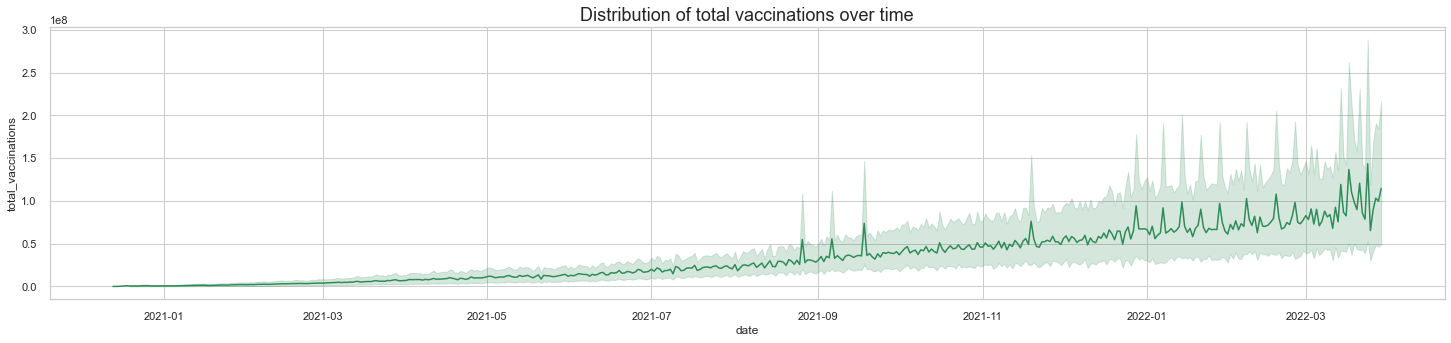

In [21]:
# DISTIBUSI BERDASARKAN WAKTU
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style('whitegrid')
sns.lineplot(data=data, x="date", y="total_vaccinations", color="seagreen")
plt.title("Distribution of total vaccinations over time", fontsize=18);

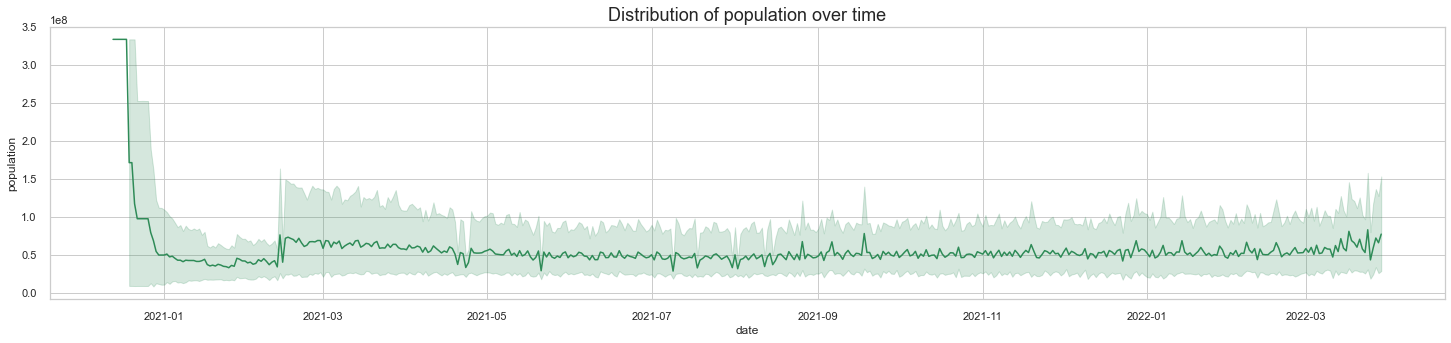

In [22]:
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style('whitegrid')
sns.lineplot(data=data, x="date", y="population", color="seagreen")
plt.title("Distribution of population over time", fontsize=18);

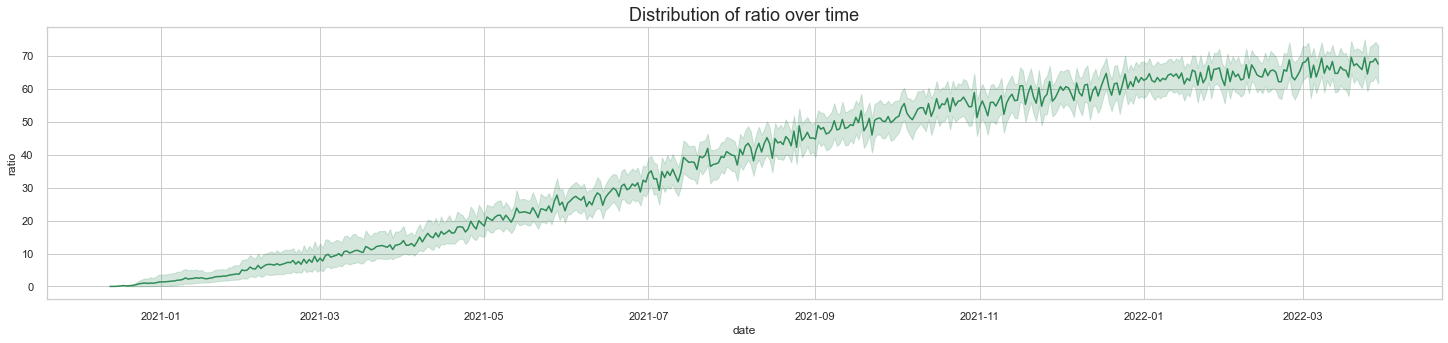

In [23]:
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style('whitegrid')
sns.lineplot(data=data, x="date", y="ratio", color="seagreen")
plt.title("Distribution of ratio over time", fontsize=18);

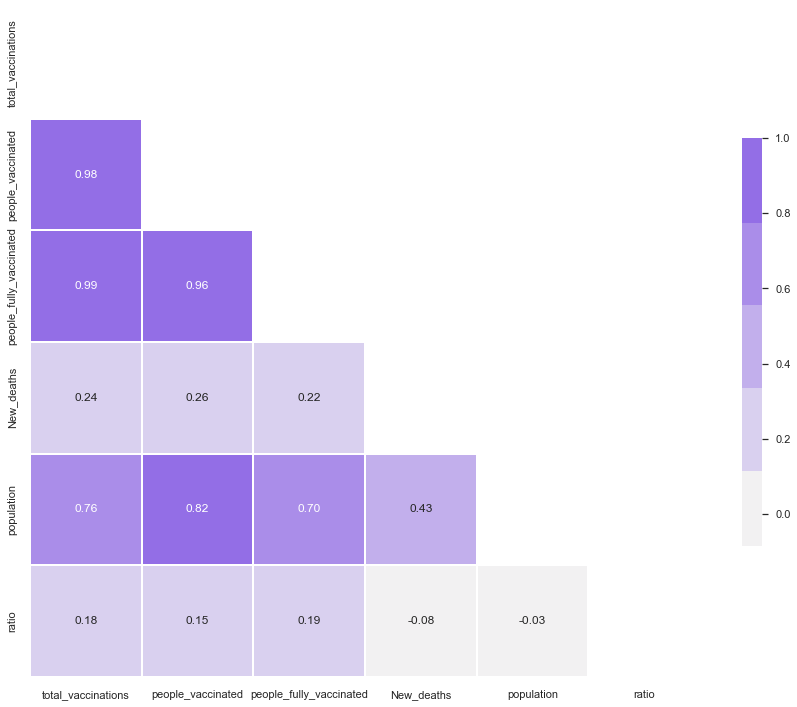

In [24]:
sns.set_theme(style="white")

#correlation matrix untuk tau korelasi koefisien diantara semua variables
# menghitug correlation matrix
corr = data.corr()

# genrasi upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# buat matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# generasi diverging
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, )

# Gambaran heatmap dengan mask dan rasio aspek yang benar
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, cbar_kws={"shrink": .5})
plt.show()

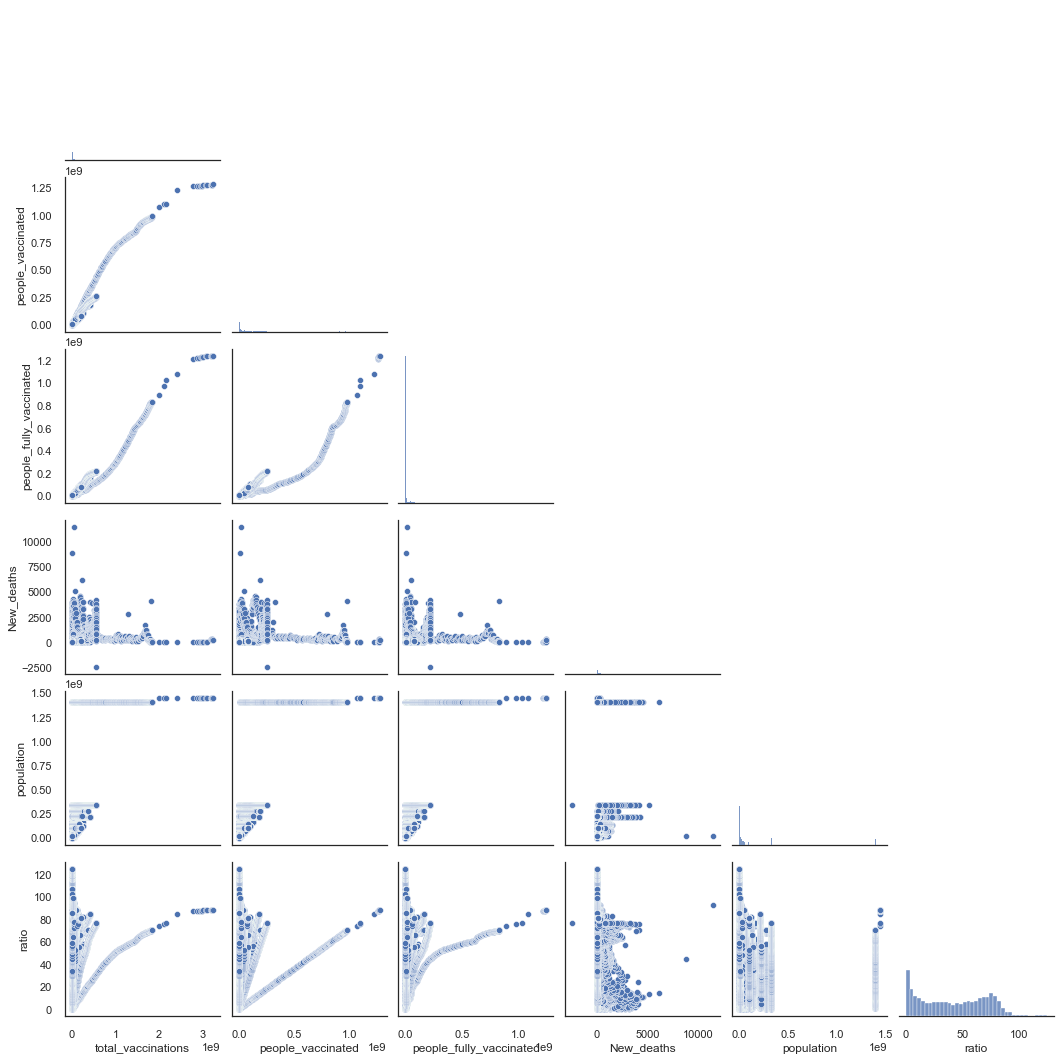

In [25]:
sns.pairplot(data = data, corner=True);

Text(0.5, 1.0, 'ratio vs New_deaths Indonesia')

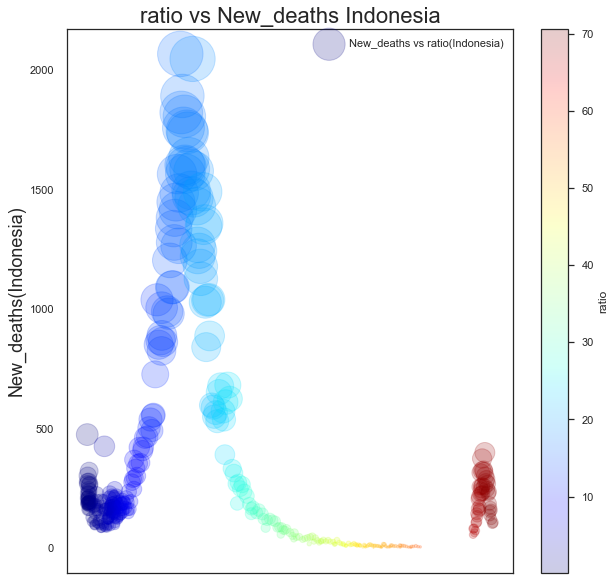

In [26]:
#REGRESI
df_indo = data[data['country']=='Indonesia']
df_indo.plot(
    kind='scatter',
    x='ratio',
    y='New_deaths',
    label='New_deaths vs ratio(Indonesia)',
    alpha=0.2,
    figsize=(10,10),
    s=df_indo['New_deaths'],
    c='ratio',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

plt.xlabel('ratio(%)',fontsize=15)
plt.ylabel('New_deaths(Indonesia)',fontsize=18)
plt.title('ratio vs New_deaths Indonesia',fontsize=22)

In [27]:
# SIMPLE LINEAR REGRESI

In [28]:
# Define x,y
X = df_indo[['ratio']]
y = df_indo[['New_deaths']]

In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [30]:
# Standard Normalization
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)


y_train = std.fit_transform(y_train)
y_test = std.fit_transform(y_test)

In [31]:
# Instantiate model
model = LinearRegression()

# Fit the model
model.fit(X_train,y_train)

LinearRegression()

In [32]:
# Coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[-0.23997276]]
Intercept:  [-3.48092274e-17]


In [33]:
# Prediction
y_pred = std.inverse_transform(model.predict(X_test))

Text(0.5, 1.0, 'Liner Regression')

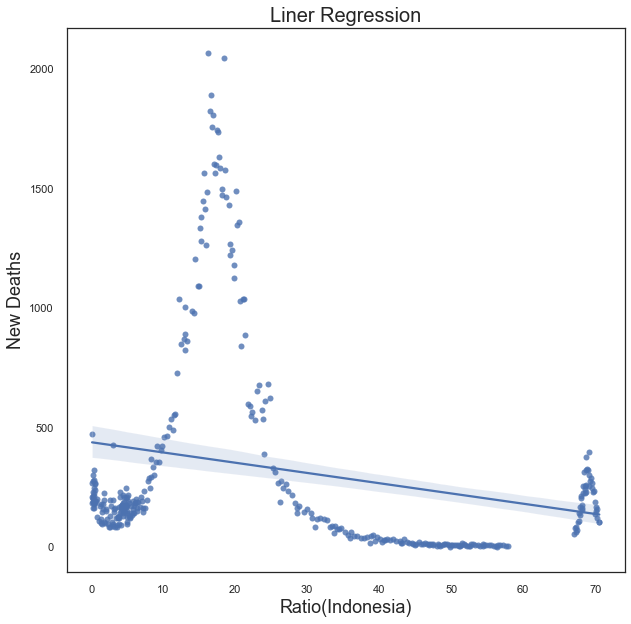

In [34]:
# Plot result

X = df_indo['ratio']
y = df_indo['New_deaths']

plt.figure(figsize=(10,10))
sns.regplot(x=X, y=y)

plt.xlabel('Ratio(Indonesia)',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.title('Liner Regression',fontsize=20)

In [35]:
# EVALUASI
# fungsi untuk evaluasi model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_test, y_test)}
    return scores

{'Training MAE': 0.7049222562979544,
 'Test MAE': 0.655783731078264,
 'Training R^2': 0.05758692615508654,
 'Test R^2': 0.029016653950054483}